<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 1</b></p>
<p style="text-align: center;"><b>Note: This assignment has 10 questions (10 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1. Use the diamonds dataset from Seaborn for this question
##### Q1a. Load the diamonds dataset and calculate the correlation between `price` and `carat`. 
##### Q1b. Display a scatter plot to visualize the relationship between `price` and `carat`, with plot title `Price vs Carat of Diamonds`. Describe the plot.
##### Q1c. Create a new column `price_per_carat` to calculate the price per carat for each diamond and display the first 10 rows. What is the `price_per_carat` for the 8th row?
##### Q1d. Visualize the distribution of `price_per_carat` across different `clarity` using a violin plot, with plot title `Price per Carat Distribution by Clarity`. What does the plot tell you about relationship between `price_per_carat` and `clarity`?
##### Q1e. Using plotly.express, create an interactive scatter plot of `price` vs. `carat`, colored by `clarity`, and add hover information to display `cut`. From your plot, what is the `price`, `carat`, `clarity`, and `cut` for the diamond with the 2nd largest `carat` value.

In [1]:
# Q1 Load Libraries Here
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [9]:
# Q1a

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Correlation Coefficient between Price and Carat of Diamond
diamonds['price'].corr(diamonds['carat'])

# Answer: 0.921591301193476

0.921591301193476

Text(0.5, 1.0, 'Scatter Plot of Carat of Diamond vs. Price')

Text(0.5, 0, 'Carat')

Text(0, 0.5, 'Price')

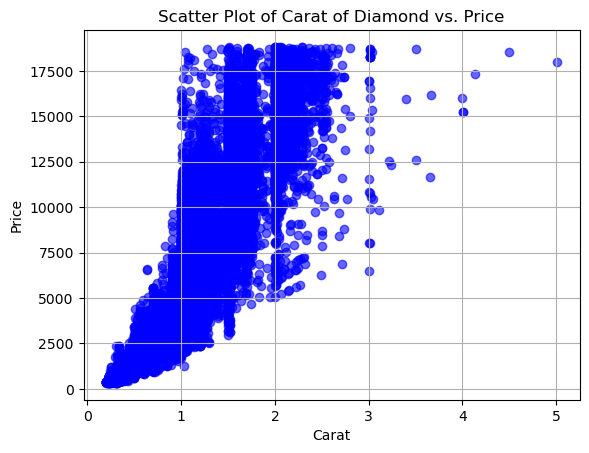

In [10]:
# Q1b
plt.scatter(diamonds['carat'], diamonds['price'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Carat of Diamond vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# Answer: Price and Carat have a positive relationship with each other.

In [11]:
# Q1c
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']
diamonds.head(10)
diamonds['price_per_carat'][7]

# Answer: 1296.1538461538462

carat        cut color clarity  depth  table  price     x     y     z  \
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47   
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53   
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49   
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39   

   price_per_carat  
0      1417.391304  
1      1552.380952  
2      1421.739130  
3      1151.724138  
4      1080.645161  
5      1400.000000  
6      1400.000000  
7      1296.153846  
8      1531.818182  
9      1469.565217

1296.1538461538462

<Figure size 1000x600 with 0 Axes>

{'bodies': [<matplotlib.collections.PolyCollection at 0x1795b5a10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1795ea3d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1795f3290>,
 'cbars': <matplotlib.collections.LineCollection at 0x1795fd110>}

Text(0.5, 1.0, 'Price per Carat Distribution by Clarity')

([<matplotlib.axis.XTick at 0x1795bd250>,
 [Text(1, 0, 'SI2'),
  Text(2, 0, 'SI1'),
  Text(3, 0, 'VS1'),
  Text(4, 0, 'VS2'),
  Text(5, 0, 'VVS2'),
  Text(6, 0, 'VVS1'),
  Text(7, 0, 'I1'),
  Text(8, 0, 'IF')])

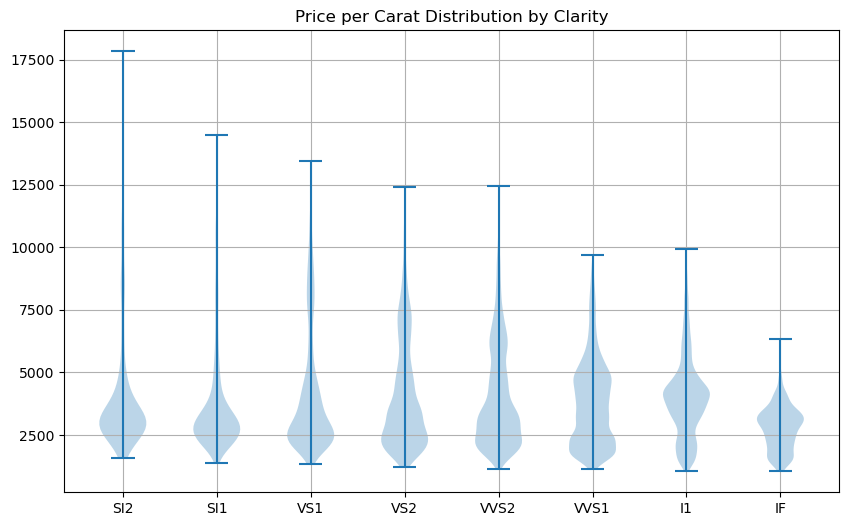

In [12]:
# Q1d

# Note: violin plot expects only numerical data.

# Convert clarity categories to numerical values
clarity_categories = diamonds['clarity'].astype('category').cat.codes

# Create a violin plot using plt.violinplot
plt.figure(figsize=(10, 6))
plt.violinplot([diamonds.loc[clarity_categories == i, 'price_per_carat'] for i in range(len(diamonds['clarity'].unique()))])
plt.title('Price per Carat Distribution by Clarity')

# Add custom ticks for clarity categories
plt.xticks(range(1, len(diamonds['clarity'].unique()) + 1), diamonds['clarity'].unique())

# Display the plot
plt.grid(True)
plt.show()

# Answer:

In [13]:
# Q1e
px.scatter(diamonds,            # Dataset  
           x='price', 
           y='carat', 
           color = 'clarity',
           hover_data= 'cut')   # To show hover information

# Find the second-largest carat value
second_largest_carat = diamonds['carat'].nlargest(2).iloc[1] # n.largest find the two largest number, index 1 gives me the second largest
second_largest_carat



# Answer: From the plot, the second largest carat is 4.5, with price, clarity and cut being 18.531k, I1 and fair respectively

4.5

### Q2. Use the tips dataset from Seaborn for this question
##### Q2a. Load the tips dataset and run a code that returns the following:
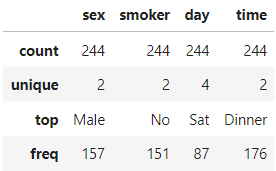

##### Q2b. Create a new feature `meal_time1` that categorizes tips into 'Morning' (when `time` is 'Lunch') or 'Evening' (when `time` is 'Dinner') using `numpy.where()`
##### Q2c. Create a new feature `meal_time2` that categorizes tips into 'Morning' (when `time` is 'Lunch') or 'Evening' (when `time` is 'Dinner') using two `loc[]`
##### Q2d. Between `numpy.where()` and `loc[]`, which approach is generally more efficient?
##### Q2e. Create a new column `tip_percentage` to calculate the `tip` as a percentage of `total_bill`. Use a groupby() to group the data by `time` and `smoker` and calculate the average `tip_percentage` per group. Which group tipped the most / least?

In [1]:
# Q2 Load Libraries Here
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
# Q2a
# Load the diamonds dataset
tips = sns.load_dataset('tips')

type(tips)

def freq(x):
    mode_val = x.mode()[0] # Takes the most frequent category
    return (x == mode_val).sum() # Returns the sum

df = tips.agg({
    'sex': ['count', 'nunique', lambda x: x.mode()[0], freq],
    'smoker': ['count', 'nunique', lambda x: x.mode()[0], freq],
    'day': ['count', 'nunique', lambda x: x.mode()[0], freq],
    'time': ['count', 'nunique', lambda x: x.mode()[0], freq]
}
    )

# Rename for better clarity (optional)
df.rename(index={df.index[1]: 'unique', df.index[2]: 'top'}, inplace=True)

print(df)

pandas.core.frame.DataFrame

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


In [21]:
# Q2b
tips['meal_time1'] = np.where(tips['time'] == "Lunch", 'Morning', 'Evening')
tips

total_bill   tip     sex smoker   day    time  size meal_time1
0         16.99  1.01  Female     No   Sun  Dinner     2    Evening
1         10.34  1.66    Male     No   Sun  Dinner     3    Evening
2         21.01  3.50    Male     No   Sun  Dinner     3    Evening
3         23.68  3.31    Male     No   Sun  Dinner     2    Evening
4         24.59  3.61  Female     No   Sun  Dinner     4    Evening
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3    Evening
240       27.18  2.00  Female    Yes   Sat  Dinner     2    Evening
241       22.67  2.00    Male    Yes   Sat  Dinner     2    Evening
242       17.82  1.75    Male     No   Sat  Dinner     2    Evening
243       18.78  3.00  Female     No  Thur  Dinner     2    Evening

[244 rows x 8 columns]

In [22]:
# Q2c
tips.loc[(tips['time'] == "Lunch"), 'meal_time2'] = 'Morning'
tips.loc[(tips['time'] == "Dinner"), 'meal_time2'] = 'Evening'
tips

total_bill   tip     sex smoker   day    time  size meal_time1 meal_time2
0         16.99  1.01  Female     No   Sun  Dinner     2    Evening    Evening
1         10.34  1.66    Male     No   Sun  Dinner     3    Evening    Evening
2         21.01  3.50    Male     No   Sun  Dinner     3    Evening    Evening
3         23.68  3.31    Male     No   Sun  Dinner     2    Evening    Evening
4         24.59  3.61  Female     No   Sun  Dinner     4    Evening    Evening
..          ...   ...     ...    ...   ...     ...   ...        ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3    Evening    Evening
240       27.18  2.00  Female    Yes   Sat  Dinner     2    Evening    Evening
241       22.67  2.00    Male    Yes   Sat  Dinner     2    Evening    Evening
242       17.82  1.75    Male     No   Sat  Dinner     2    Evening    Evening
243       18.78  3.00  Female     No  Thur  Dinner     2    Evening    Evening

[244 rows x 9 columns]

In [ ]:
# Q2d

# Answer: numpy.where is more efficient as it has a similar function to an if else statement.

In [25]:
# Q2e.
tips['tip_percentage'] = tips['tip'] / tips['total_bill']
tips.groupby(['time','smoker'])['tip_percentage'].mean()
# Answer: Tipped the most is a smoker at lunch time. Tipped the least is a non-smoker at dinner time.

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_69945/3829266088.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



time    smoker
Lunch   Yes       0.170404
        No        0.160920
Dinner  Yes       0.160828
        No        0.158653
Name: tip_percentage, dtype: float64

### Q3. Use the penguins dataset from Seaborn for this question
##### Q3a. Load the penguins dataset and generate a default profile report using `ydata_profiling`. Use this profile report to answer the remaining questions.
##### Q3b. Check the distribution of `body_mass_g`. Is it normally distributed or skewed? If skewed, is it left-skewed or right-skewed?
##### Q3c. Which two variables exhibit the strongest negative correlation, and what is the value of this correlation? Which section of the profile report did you retrieve this information?
##### Q3d. What is the interquartile range for `bill_depth_mm`?
##### Q3e. Are there any other variable(s) that will always be missing when `bill_lenght_mm` is missing? If yes, which variable(s)? Explain how you arrived at your answer.

In [4]:
# Q3 Load Libraries Here
penguins= sns.load_dataset('penguins')

penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [ ]:
# Q3a.


In [ ]:
# Q3b.

# Answer:

In [ ]:
# Q3c.

# Answer:

In [ ]:
# Q3d.

# Answer: 

In [ ]:
# Q3e.

# Answer: 

### Q4. Only `numpy` library can be imported for this question
##### Q4a. First, create a 1D NumPy array of integers from 1 to 100. Then, use the `reshape` method to reshape this array into a 10x10 matrix. Finally, assign the transpose of this matrix to object `transpose_matrix` and display it.
##### Q4b. Replace all even numbers in `transpose_matrix` with 0, and display the updated `transpose_matrix`.
##### Q4c. Extract and display the subarray from the 2nd to 4th row and 3rd to 5th column of the `transpose_matrix`. What is the number at the center of this subarray?
##### Q4d. Create a second matrix of the same shape (i.e. 10x10) filled with random integers between 1 and 100, and assign this matrix to object `matrix2`. Using an appropriate function in numpy, set the seed value to 88 for this question to ensure reproducibility of solution. Display `matrix2`.
##### Q4e. Perform all these calculations in a single line of code: Compute the dot product of `matrix2` and `transpose_matrix` (i.e. `matrix2 ⋅ transpose_matrix`). After obtaining the dot product, calculate the mean of all the values in the resulting matrix. What is the mean value obtained?

In [1]:
# Q4 Load Libraries Here
import numpy as np

In [23]:
# Q4a.
array_1d = np.arange(1, 101)

matrix_10x10 = array_1d.reshape(10,10) # inputs here is to denote, n, m values, (n x m)

transpose_matrix= np.transpose(matrix_10x10) # another way is to simply do matrix_10x10.T (.T is a builtin transpose function in python)

transpose_matrix


array([[  1,  11,  21,  31,  41,  51,  61,  71,  81,  91],
       [  2,  12,  22,  32,  42,  52,  62,  72,  82,  92],
       [  3,  13,  23,  33,  43,  53,  63,  73,  83,  93],
       [  4,  14,  24,  34,  44,  54,  64,  74,  84,  94],
       [  5,  15,  25,  35,  45,  55,  65,  75,  85,  95],
       [  6,  16,  26,  36,  46,  56,  66,  76,  86,  96],
       [  7,  17,  27,  37,  47,  57,  67,  77,  87,  97],
       [  8,  18,  28,  38,  48,  58,  68,  78,  88,  98],
       [  9,  19,  29,  39,  49,  59,  69,  79,  89,  99],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [16]:
# Q4b.
transpose_matrix = np.where(transpose_matrix%2 == 0, 0, transpose_matrix) # Use of % to check for remainder
transpose_matrix

array([[ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [15]:
# Q4c.
sub_array = transpose_matrix[1:4,2:5]
sub_array
# Answer:

array([[ 0,  0,  0],
       [23, 33, 43],
       [ 0,  0,  0]])

In [20]:
# Q4d.
np.random.seed(88)
matrix2 = np.random.randint(0, 101, size=(10, 10)) # 10x10 matrix with random integers between 0 and 100
matrix2

array([[ 88,  32,  79,  49,  20,  62,  97,  69,  48,  34],
       [ 97,  75,   4,  71,  90,  89,   7,  39,  70,  10],
       [ 86,  29,  13,  99,  77,   1,  40,  78,  78,  11],
       [ 16,  32,   5,  21,   3,  94,  89,  13,  47,  67],
       [ 46,  23,  77,  51,  41,  28,  63,  88,  21,  28],
       [ 80,  38, 100,   0,  34,  75,  34,  92,  85,  75],
       [ 94,  25,  50,  61,  37,  54,  65,  49,  56,  86],
       [ 61,  78,  79,  81,  27,  49,   7,   4,  35,  86],
       [ 92,  70,   6,  46,  48,  83,  48,  94,  77,  18],
       [ 71,  73,  90,   6,  43,  44,  93,  83,  86,   6]])

In [24]:
# Q4e.
np.multiply(matrix2,transpose_matrix).mean()
# Answer: 2665.07

2665.07

### Q5. Use the tips dataset from Seaborn for this question
##### Q5a. Load the tips dataset into a pandas DataFrame. Filter the DataFrame to include only rows where the `total_bill` is greater than 20. How many rows meet this condition?
##### Q5b. Create a pivot table that shows the sum of `total_bill` for each `day` and `time`. From the pivot table, what is the sum of `total_bill` for `Dinner` on `Sat`?
##### Q5c. Use the `melt()` function to reshape the DataFrame to long format, such that it returns the following:
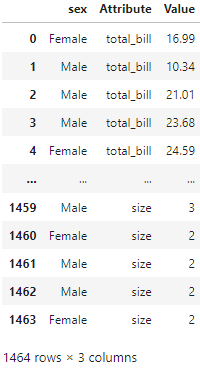
##### Q5d. Sort the DataFrame by `total_bill` in descending order and display the top 10 rows. What is the `total_bill` for the top row and what does it mean?
##### Q5e. What are the sample standard_deviation and population standard_deviation of `total_bill`? 

In [14]:
# Q5 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd


In [4]:
# Q5a.
tips = sns.load_dataset('tips')
len(tips[tips['total_bill'] > 20])

# Answer: 97 rows meet this condition

97

In [5]:
# Q5b.
tips.groupby(['day','time'])['total_bill'].sum()
# Answer: 1778.40

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_71974/2302807130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day','time'])['total_bill'].sum()


day   time  
Thur  Lunch     1077.55
      Dinner      18.78
Fri   Lunch       89.92
      Dinner     235.96
Sat   Lunch        0.00
      Dinner    1778.40
Sun   Lunch        0.00
      Dinner    1627.16
Name: total_bill, dtype: float64

In [17]:
# Q5c.
tips.melt(id_vars='sex', var_name = 'Attribute', value_name = 'Value')

sex   Attribute  Value
0     Female  total_bill  16.99
1       Male  total_bill  10.34
2       Male  total_bill  21.01
3       Male  total_bill  23.68
4     Female  total_bill  24.59
...      ...         ...    ...
1459    Male        size      3
1460  Female        size      2
1461    Male        size      2
1462    Male        size      2
1463  Female        size      2

[1464 rows x 3 columns]

In [12]:
# Q5d.
tips.sort_values('total_bill', ascending= False).head(10)
# Answer: 50.81

total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
156       48.17   5.00    Male     No   Sun  Dinner     6
182       45.35   3.50    Male    Yes   Sun  Dinner     3
102       44.30   2.50  Female    Yes   Sat  Dinner     3
197       43.11   5.00  Female    Yes  Thur   Lunch     4
142       41.19   5.00    Male     No  Thur   Lunch     5
184       40.55   3.00    Male    Yes   Sun  Dinner     2
95        40.17   4.73    Male    Yes   Fri  Dinner     4

In [18]:
# Q5e.
# ddof stands for degrees of freedom.

# Sample sd
np.std(tips['total_bill'], ddof = 1)

# Population sd
np.std(tips['total_bill'], ddof= 0) 
# Answer: Sample SD: 8.902411954856856 ; Population SD: 8.88415057777113

8.902411954856856

8.88415057777113

### Q6. Use the titanic dataset from Seaborn for this question
##### Q6a. Load the titanic dataset into a pandas DataFrame. Split the titanic dataset into two separate DataFrames: `df1` containing columns [`pclass`, `sex`, `age`, `fare`] and `df2` containing columns [`sex`, `embarked`, `class`, `deck`]. Perform an inner merge on the `sex` column to merge `df1` and `df2`, and assign the merged result to `merged_df`. How many rows does `merged_df` contain?
##### Q6b. In a single line of code, utilize two different pandas methods to determine the number of missing values in each column of `merged_df`. Identify the column with the most missing values in `merged_df` and state how many missing values it contains.
##### Q6c. Replace the missing values in the column identified in `Q6b` with the column's most frequent value (mode), and display the resulting DataFrame. What is the column's most frequent value (mode)?
##### Q6d. Filter `merged_df` to display rows where `age` is greater than 30 and `fare` is above 50. How many rows meet these conditions?
##### Q6e. Group `merged_df` by `pclass` and calculate the mean and median of `fare` for each class. Display the results. Based on the output, identify the largest mean value and the smallest median value.

In [ ]:
# Q6 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd

In [28]:
# Q6a.
titanic = sns.load_dataset('titanic')

df1 = titanic[["pclass", "sex", "age", "fare"]]
df2 = titanic[["sex","embarked","class","deck"]]

merged_df = pd.merge(df1, df2, on='sex', how='inner')
merged_df
# Answer: 431525

891

pclass   sex   age  fare embarked   class deck
0            3  male  22.0  7.25        S   Third  NaN
1            3  male  22.0  7.25        S   Third  NaN
2            3  male  22.0  7.25        Q   Third  NaN
3            3  male  22.0  7.25        S   First    E
4            3  male  22.0  7.25        S   Third  NaN
...        ...   ...   ...   ...      ...     ...  ...
431520       3  male  32.0  7.75        S  Second  NaN
431521       3  male  32.0  7.75        S   Third  NaN
431522       3  male  32.0  7.75        S  Second  NaN
431523       3  male  32.0  7.75        C   First    C
431524       3  male  32.0  7.75        Q   Third  NaN

[431525 rows x 7 columns]

In [30]:
# Q6b.

merged_df.isnull().sum()


# Answer: deck has the most number of missing values, standing at 339905.

pclass           0
sex              0
age          88190
fare             0
embarked       628
class            0
deck        339905
dtype: int64

In [35]:
# Q6c.
merged_df.fillna({'deck': merged_df['deck'].mode()[0]}) # index 0 of mode refers to the most frequent

merged_df['deck'].mode()[0]
# Answer: C


pclass   sex   age  fare embarked   class deck
0            3  male  22.0  7.25        S   Third    C
1            3  male  22.0  7.25        S   Third    C
2            3  male  22.0  7.25        Q   Third    C
3            3  male  22.0  7.25        S   First    E
4            3  male  22.0  7.25        S   Third    C
...        ...   ...   ...   ...      ...     ...  ...
431520       3  male  32.0  7.75        S  Second    C
431521       3  male  32.0  7.75        S   Third    C
431522       3  male  32.0  7.75        S  Second    C
431523       3  male  32.0  7.75        C   First    C
431524       3  male  32.0  7.75        Q   Third    C

[431525 rows x 7 columns]

'C'

In [37]:
# Q6d.
len(merged_df[(merged_df['age'] > 30) & (merged_df['fare'] > 50)])
# Answer: 36056

36056

In [38]:
# Q6e.
merged_df.groupby('pclass')['fare'].agg(['mean','median'])
# Answer: largest mean: 78.718097 ; smallest median: 8.05

mean  median
pclass                   
1       78.718097   53.10
2       20.358829   13.50
3       13.298541    8.05

### Q7. Use the titanic dataset from Seaborn for this question
##### Q7a. Load the titanic dataset into a pandas DataFrame. Create a Python function `column_sum(df, column_name)` that accepts a DataFrame and a column name as arguments and returns the sum of all values in the specified column. Use this function on the titanic DataFrame to calculate the sum of the `fare` column. What is the resulting value, and what does this value represent?
##### Q7b. Define a Python function `categorize_age(age)` that accepts an age as input and returns a string: `Child` if the age is less than 18, `Adult` if the age is between 18 (inclusive) and 60 (exclusive), and `Senior` if the age is 60 or older. Apply this function to a test input value of 88. What is the output of the function? 
##### Q7c. Create a Python function `count_by_class_and_survived(df, pclass, survived)` that takes a DataFrame, a passenger class (`pclass`), and a survival status (`survived`) as inputs, and returns the count of passengers matching these criteria using control flow statements (`for` loops and `if` statements). (Hint: Utilize the `iterrows()` method in pandas to make your code concise). Apply this function to the titanic DataFrame to determine the total number of survivors in passenger class 2.

In [ ]:
# Q7 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd

In [39]:
# Q7a.
titanic = sns.load_dataset('titanic')

def column_sum(df, column_name):
    value = df[column_name].sum()
    return value

column_sum(titanic, "fare")
# Answer: 28693.9493, it represents total revenue

28693.9493

In [43]:
# Q7b.
def categorize_age(age):
    if age < 18:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"
    
categorize_age(88)
# Answer: Senior

'Senior'

In [51]:
# Q7c.
def count_by_class_and_survived(df, pclass, survived):
    value = 0
    for Index, row in df.iterrows(): 
        if row['pclass']==pclass and row['survived'] == survived:
            value += 1
        else:
            continue
    return value

count_by_class_and_survived(titanic, 2, 1) # 1 refers to survived, 0 refers to did not survive
# Answer: 87 people survived in passenger class 2.

87

### Q8. Use the flights dataset from Seaborn for this question
##### Q8a. Load the flights dataset into a pandas DataFrame. In a single line of code, calculate the total number of passengers for each year and assign the result to a variable named `yearly_passengers`. Display the results. How many passengers were there in the year with the fewest total passengers?
##### Q8b. Create a line plot, with a figure size of (10, 6), showing the total number of passengers for each year. Set the line style to be dashed (--), set the line color to red, set the line width to 2, and use circle markers (o) for the data points.
##### Q8c. Building on your code from Q8b., add a legend to the plot with the label `Total Passengers`. Additionally, include a suitable title and labels for both the x-axis and y-axis.
##### Q8d. Building on your code from Q8c., add annotations to highlight the years with the highest and lowest total passengers on the plot. Use text (`Highest Point`, `Lowest Point`) and blue arrows to point to these data points. (Hint: Utilize the `idxmax()` and `idxmin()` methods in pandas to make your code concise).
##### Q8e. Building on your code from Q8d., enable grid lines on the plot and customize their color to light pink with a dashed (--) style. Change the background color of the plot to `#FFFFE0` (i.e. a light yellow). What observations can you make about the trend depicted in the plot?

In [58]:
# Q8 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Total number of passengers across years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Passengers')

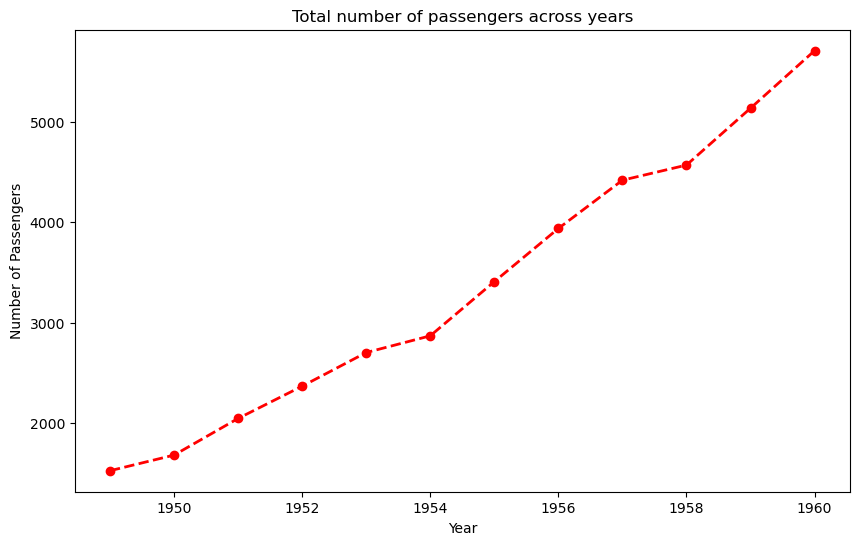

In [65]:
# Q8a.
flights = sns.load_dataset('flights')
yearly_passengers =flights.groupby('year')['passengers'].sum()
yearly_passengers

# Answer: In the year 1949, 1520 passengers.

<Figure size 1000x600 with 0 Axes>

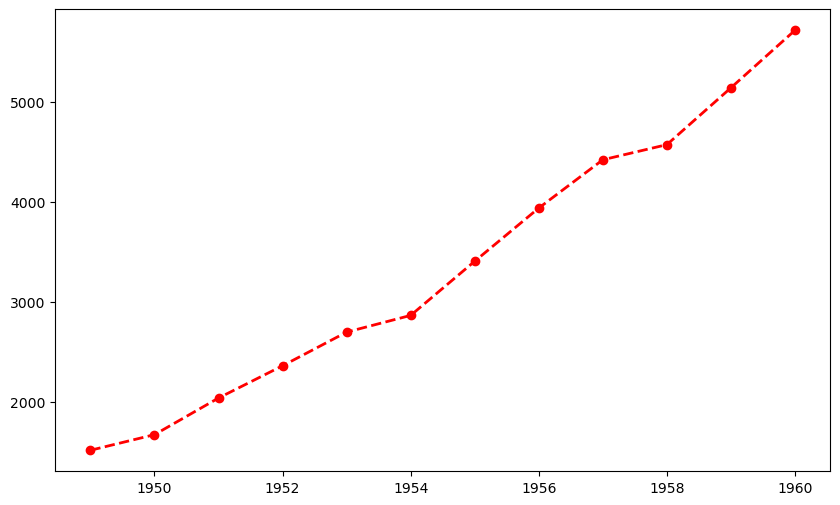

In [76]:
# Q8b.
plt.figure(figsize =(10,6))
plt.plot(yearly_passengers.index,yearly_passengers.values,
         color = 'red',
         linestyle='--',
         linewidth = 2,
         marker = 'o')


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Total number of passengers across years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Passengers')

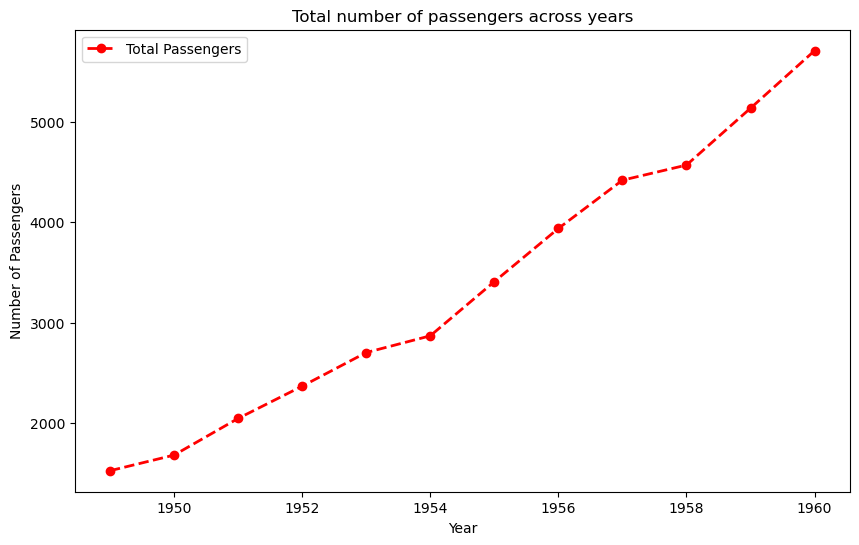

In [82]:
# Q8c.
plt.figure(figsize =(10,6))
plt.plot(yearly_passengers.index,yearly_passengers.values,
         color = 'red',
         linestyle='--',
         linewidth = 2,
         marker = 'o',
         label = 'Total Passengers')
plt.title('Total number of passengers across years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()



<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Total number of passengers across years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Passengers')

Text(1960, 6014, 'Highest Point: 5714')

Text(1949, 1320, 'Lowest Point: 1520')

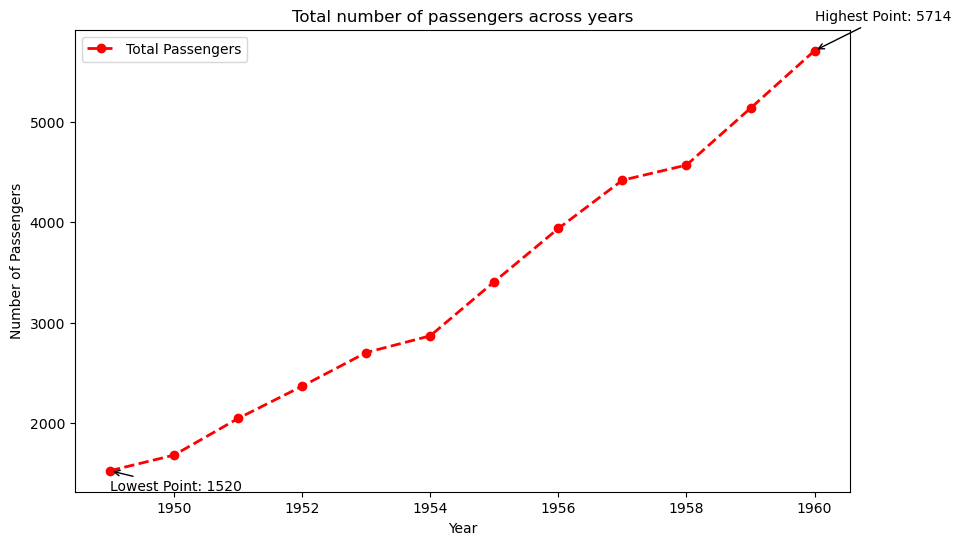

In [93]:
# Q8d.
plt.figure(figsize =(10,6))
plt.plot(yearly_passengers.index,yearly_passengers.values,
         color = 'red',
         linestyle='--',
         linewidth = 2,
         marker = 'o',
         label = 'Total Passengers')
plt.title('Total number of passengers across years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

max_pass = yearly_passengers.max()
max_year = yearly_passengers.idxmax()
plt.annotate(f'Highest Point: {max_pass}',                                        # text annotation
             xy=(max_year, max_pass),                                # point to annotate
             xytext=(max_year, max_pass+300),                         # point to place the text (slightly above xy point)
             arrowprops=dict(color='black',                          # properties of arrow connecting xy to xytext
                             arrowstyle='->'))
min_pass = yearly_passengers.min()
min_year = yearly_passengers.idxmin()
plt.annotate(f'Lowest Point: {min_pass}',                                        # text annotation
             xy=(min_year, min_pass),                                # point to annotate
             xytext=(min_year, min_pass-200),                         # point to place the text (slightly above xy point)
             arrowprops=dict(color='black',                          # properties of arrow connecting xy to xytext
                             arrowstyle='->'))


plt.show()



<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Total number of passengers across years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Passengers')

Text(1960, 6014, 'Highest Point: 5714')

Text(1949, 1320, 'Lowest Point: 1520')

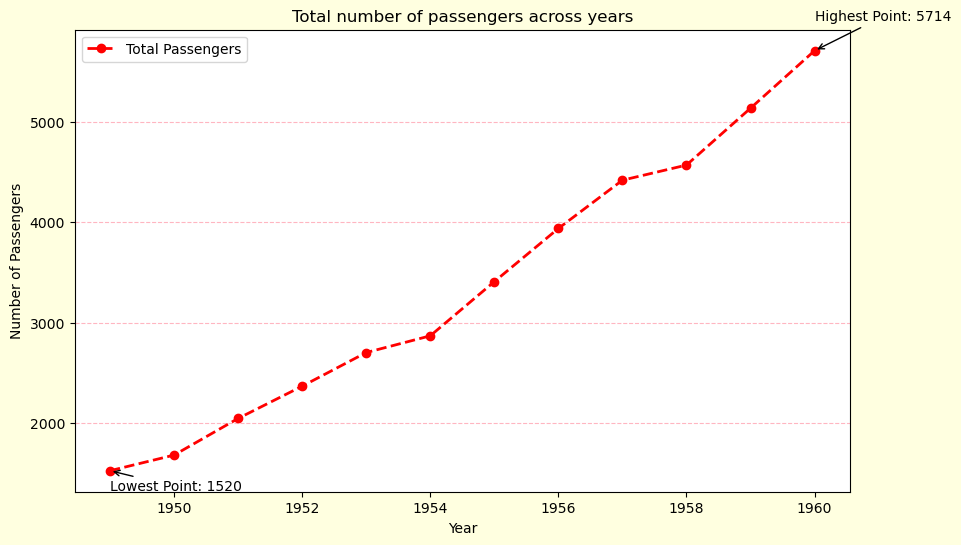

In [94]:
# Q8e.
plt.figure(figsize =(10,6),
           facecolor= "#FFFFE0")
plt.plot(yearly_passengers.index,yearly_passengers.values,
         color = 'red',
         linestyle='--',
         linewidth = 2,
         marker = 'o',
         label = 'Total Passengers')
plt.title('Total number of passengers across years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()

max_pass = yearly_passengers.max()
max_year = yearly_passengers.idxmax()
plt.annotate(f'Highest Point: {max_pass}',                                        # text annotation
             xy=(max_year, max_pass),                                # point to annotate
             xytext=(max_year, max_pass+300),                         # point to place the text (slightly above xy point)
             arrowprops=dict(color='black',                          # properties of arrow connecting xy to xytext
                             arrowstyle='->'))
min_pass = yearly_passengers.min()
min_year = yearly_passengers.idxmin()
plt.annotate(f'Lowest Point: {min_pass}',                                        # text annotation
             xy=(min_year, min_pass),                                # point to annotate
             xytext=(min_year, min_pass-200),                         # point to place the text (slightly above xy point)
             arrowprops=dict(color='black',                          # properties of arrow connecting xy to xytext
                             arrowstyle='->'))
plt.grid(True, axis = 'y', color = 'lightpink', linestyle = '--')

plt.show()
# Answer: Passenger count is growing at a positive rate over the years.

### Q9. Use the titanic dataset from Seaborn for this question.
##### Q9a. Load the titanic dataset into a pandas DataFrame. Create a FacetGrid to visualize the `age` distribution across different passenger classes (`pclass`) and survival status (`survived`). Use `sns.histplot` to plot histograms on the FacetGrid, setting the `binwidth` to 5 for a clearer view of the distribution. Set the plot color to black. Apply additional customizations to achieve the desired appearance below:
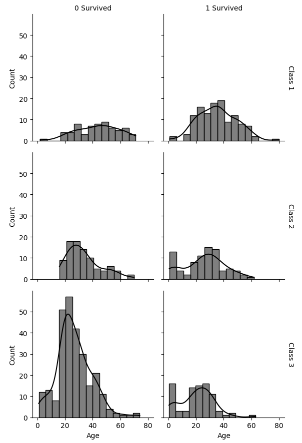 
##### Q9b. What are some observations that you can make from the plot in Q9a?
##### Q9c. Load the titanic dataset into a pandas DataFrame. Create an enhanced violin plot to visualize the distribution of passenger `age` across different passenger classes (`pclass`) and survival statuses (`survived`). Use a figure size of (10,6). Set the palette to `muted`. Apply additional customizations to achieve the desired appearance below:
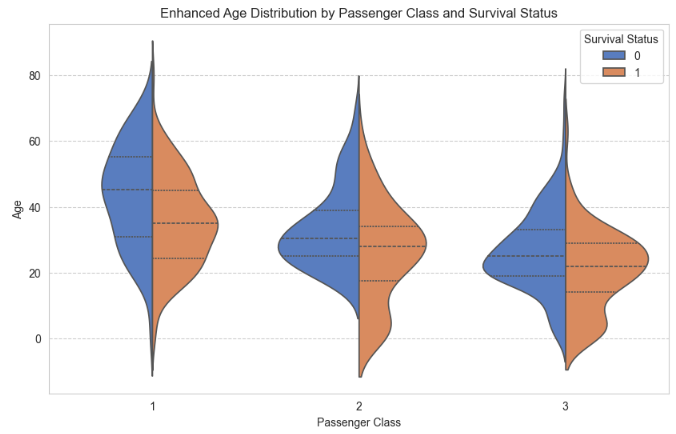
##### Q9d. What are some observations that you can make from the plot in Q9c?

In [ ]:
# Q9 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
# Q9a.
titanic = sns.load_dataset("titanic")

In [ ]:
# Q9b.

# Answer:

In [ ]:
# Q9c.


In [ ]:
# Q9d.

# Answer:

### Q10. Use the iris dataset from Seaborn for this question.
##### Q10a. Load the iris dataset into a pandas DataFrame. Using Plotly Express, create a scatter plot to visualize the relationship of `sepal_width` against `sepal_length` from the iris dataset. Color the data points by species. Add a title `Scatter Plot of Sepal Dimensions by Species` to the plot.
##### Q10b. Based on the interactive plot in Q10a, which species has the longest `sepal_length`, and what is the value of that `sepal_length`? Similarly, which species has the shortest `sepal_width`, and what is the value of that `sepal_width`?

In [96]:
# Q10 Load Libraries Here
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [97]:
# 10a.
iris = sns.load_dataset("iris")
px.scatter(iris,
           "sepal_width", "sepal_length",
           color= "species",
           title = "Scatter Plot of Sepal Dimensions by Species")

In [ ]:
# Q10b.

# Answer: Virginica has the longest sepal length, with a value of 7.9. Versicolor has the shortest sepal width, with a value of 2.